# Plots with ZFOURGE CDFS Data

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

from utils import white_viridis, scatter_colour_density

In [31]:
# Read in CDFS main data
data = pd.read_csv('DATA/ZFOURGE/CDFS/CDFS_MAIN.csv')
df = pd.DataFrame(data)
df = df[df['Use'] == 1]

In [32]:
# Font settings
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Cambria']
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Cambria'
plt.rcParams['mathtext.it'] = 'Cambria:italic'
plt.rcParams['mathtext.bf'] = 'Cambria:bold'
plt.rcParams['axes.formatter.use_mathtext'] = True
# plt.rcParams['text.usetex'] = True

# SFR vs Mass

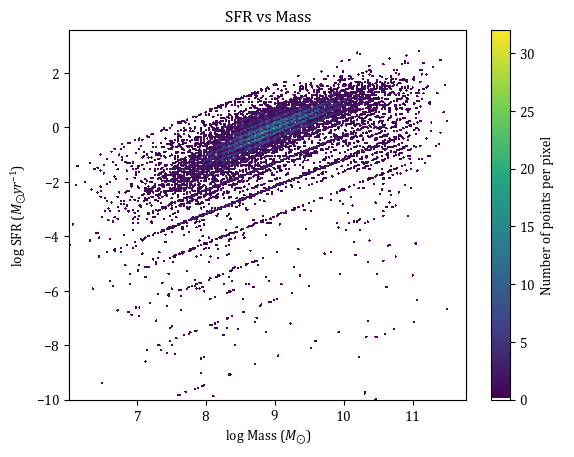

In [33]:
mass = df['lmass']
sfr = df['lsfr']

fig = plt.figure()
scatter_colour_density(fig, mass, sfr, white_viridis)
plt.xlabel('log Mass $(M_{\odot})$')
plt.ylabel('log SFR $(M_{\odot}yr^{-1})$')
plt.title('SFR vs Mass')
plt.ylim(-10)
plt.show()